In [23]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

from matplotlib import rcParams
%matplotlib inline
import statsmodels as ols

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()

In [7]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [11]:
boston.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [12]:
print boston.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:
print boston.DESCR


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [45]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [46]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


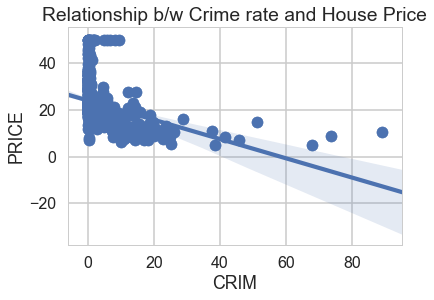

In [47]:
plt.scatter(bos.CRIM , bos.PRICE)
plt.xlabel('Per capita crime rate by towm')
plt.ylabel('House price')
plt.title('Relationship b/w Crime rate and House Price')
sns.regplot(y='PRICE',x='CRIM',data=bos,fit_reg=True)

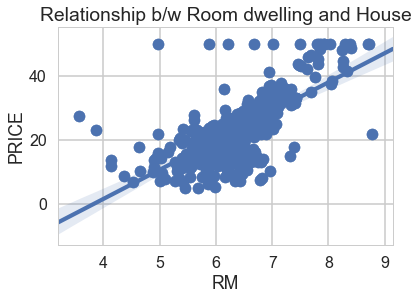

In [48]:
plt.scatter(bos.RM , bos.PRICE)
plt.xlabel('Average roomsper dwelling')
plt.ylabel('House price')
plt.title('Relationship b/w Room dwelling and House')
sns.regplot(y='PRICE',x='RM',data=bos,fit_reg=True)

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [50]:
m = ols('PRICE ~ RM',bos).fit()
print m.summary()

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 07 Dec 2017   Prob (F-statistic):           2.49e-74
Time:                        20:13:22   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [86]:
m = ols('PRICE ~ CRIM:LSTAT',bos).fit()
print m.summary()

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     107.8
Date:                Thu, 07 Dec 2017   Prob (F-statistic):           5.19e-23
Time:                        21:48:23   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3586.
Df Residuals:                     504   BIC:                             3595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9718      0.396     60.460      0.0

In [64]:
m = ols(formula='PRICE ~ CRIM',data=bos).fit()
print m.summary()

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     107.8
Date:                Thu, 07 Dec 2017   Prob (F-statistic):           5.19e-23
Time:                        20:30:04   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3586.
Df Residuals:                     504   BIC:                             3595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9718      0.396     60.460      0.0

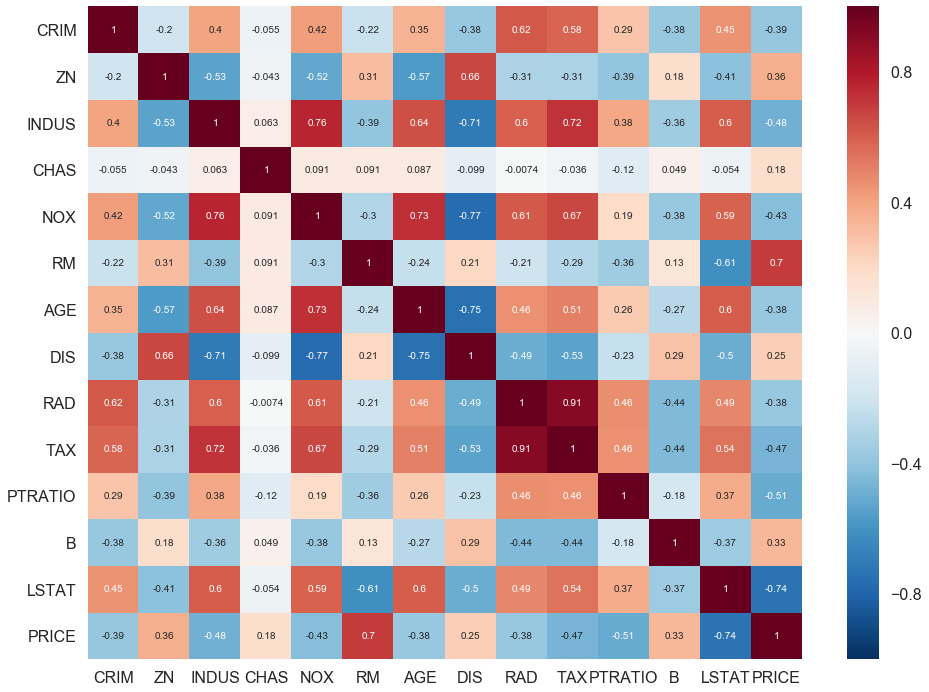

In [52]:
corr = bos.corr()
fig ,ax = plt.subplots(figsize=(16,12))
fig = sns.heatmap(corr,annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000267E0EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000026FE5400>]], dtype=object)

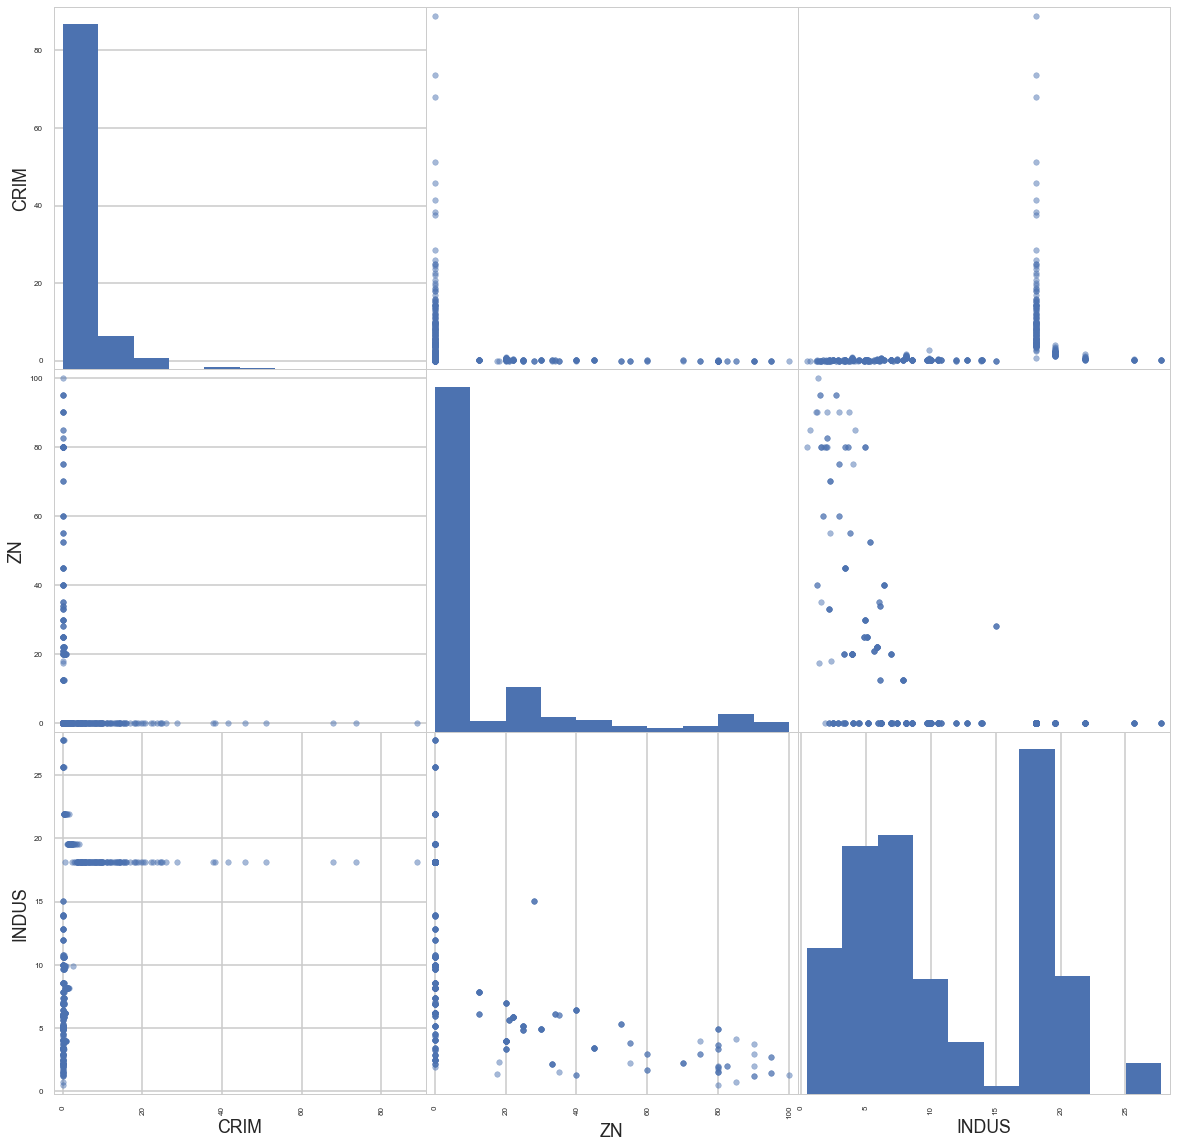

In [71]:
rcParams['figure.figsize'] = 20,20
from pandas.tools.plotting import scatter_matrix
scatter_matrix(bos.iloc[:,0:3])

In [75]:
bos.shape

(506, 14)

In [85]:
from sklearn.decomposition import PCA
target = bos.PRICE
pca =PCA(random_state=2)
pca.fit(bos.iloc[:,0:13])
print (pca.singular_values_)

AttributeError: 'PCA' object has no attribute 'singular_values_'

In [84]:
np.cumsum(pca.explained_variance_ratio_)


array([ 0.80581464,  0.9688655 ,  0.99021419,  0.99717114,  0.99847901,
        0.99920675,  0.99962677,  0.9998755 ,  0.99996089,  0.9999917 ,
        0.99999835,  0.99999992,  1.        ])